# Machine Learning Engineer Nanodegree

## Capstone Project: Using Economic Indicators to Predict Stock Market Return


This is the final capstone project of the Udacity Machine Learning Nanodegree.

In this project I would like to identify economic indicators that drive returns on the S&P 500 stock market and build a model that his high predictive power for the stock market. 

# Step 1: Data Gathering

The data set that will used for this project is from the machine learning competition website, Kaggle, and it is a collection of economic indiators from January 2007 to September 2017 by month. The dataset has 15 features and 129 data points. The

The attribution information of the dataset is as follows:

1) PeriodMonthly data in format: YYYY-MM

2) ConsConfThe consumer confidence index (CCI) is based on households' plans for major purchases and their economic situation, both currently and their expectations for the immediate future.

3) CompLeadThe composite leading indicator (CLI) is designed to provide early signals of turning points in business cycles showing fluctuation of the economic activity around its long term potential level. CLIs show short-term economic movements in qualitative rather than quantitative terms.

4) BusConfThe business confidence index (BCI) is based on enterprises' assessment of production, orders and stocks, as well as its current position and expectations for the immediate future. Opinions compared to a “normal” state are collected and the difference between positive and negative answers provides a qualitative index on economic conditions.

5) EmpEmployment rates are defined as a measure of the extent to which available labour resources (people available to work) are being used.

6) InvToSalesInventory turnover is a ratio showing how many times a company's inventory is sold and replaced over a period of time. The days in the period can then be divided by the inventory turnover formula to calculate the days it takes to sell the inventory on hand. It is calculated as sales divided by average inventory.

7) PMIThe Purchasing Managers' Index (PMI) is an indicator of the economic health of the manufacturing sector. The PMI is based on five major indicators: new orders, inventory levels, production, supplier deliveries and the employment environment.

8) SP500The Standard & Poor's 500, often abbreviated as the S&P 500, or just the S&P, is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ.

9) MfgOrdDur“The Advance Report on Durable Goods Manufacturer's Shipments, Inventories and Orders,” or the Durable Goods Report, provides data on new orders received from more than 4,000 manufacturers of durable goods, which are generally defined as higher-priced capital goods orders with a useful life of three years or more, such as cars, semiconductor equipment and turbines.

10) BldgPermA type of authorization that must be granted by a government or other regulatory body before the construction of a new or existing building can legally occur.

11) SalesAdvance Retail Sales: Retail (Excluding Food Services).

12) FedFundsFederal funds interest rate at which depository institutions (banks and credit unions) lend reserve balances to other depository institutions overnight, on an uncollateralized basis.

13) DJI The Dow Jones Industrial Average (DJIA) is a price-weighted average of 30 significant stocks traded on the New York Stock Exchange (NYSE) and the NASDAQ.

14) PayrollAll Employees: Total Nonfarm, commonly known as Total Nonfarm Payroll, is a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.

15) PersConsPersonal consumption expenditures (PCE) is the primary measure of consumer spending on goods and services in the U.S. economy. It accounts for about two-thirds of domestic final spending, and thus it is the primary engine that drives future economic growth.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('econ.csv')



/Users/benwong/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/benwong/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
data.head()


,Period,ConsConf,CompLead,BusConf,Emp,InvToSales,PMI,SP500,MfgOrdDur,BldgPerm,Sales,FedFunds,DJI,Payroll,PersCons
0,07-Jan,100.8497,101.4669,99.40803,72.11646,1.31,49.5,1424.16,217697,1626,327125,5.25,12621.69,135335,9553.1
1,07-Feb,100.6274,101.5683,99.51553,71.97358,1.30,51.9,1444.80,222033,1598,328076,5.26,12268.63,136026,9590.8
2,07-Mar,100.3566,101.6771,99.64309,71.99528,1.28,50.7,1406.95,228802,1596,330800,5.26,12354.35,136922,9631.6
3,07-Apr,100.1832,101.7829,99.82444,71.70923,1.28,52.6,1463.64,231816,1470,329653,5.25,13062.91,137730,9670.6
4,07-May,100.1231,101.8653,99.93272,71.76241,1.28,52.5,1511.14,227263,1493,334135,5.25,13627.64,138673,9708.9


# Step 2: Data Exploration and Preparation

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the economic indicator dataset
data = pd.read_csv('quarterly_change.csv', error_bad_lines=False)

print "Economic indicator dataset has {} data points with {} variables each.".format(*data.dropna().shape)

Economic indicator dataset has 124 data points with 15 variables each.


Below is the top 4 rows of the dataset along with the columns

In [4]:
data.corr()

,ConsConf_Change,CompLead_Change,BusConf_Change,Emp_Change,InvToSales_Change,PMI_Change,SP500_Change,MfgOrdDur_Change,BldgPerm_Change,Sales_Change,FedFunds_Change,DJI_Change,Payroll_Change,PersCons_Change
ConsConf_Change,1.000000,0.374707,0.321145,0.132193,-0.119922,0.301229,0.444624,0.031143,0.269307,0.176102,0.303703,0.416334,-0.105483,0.006899
CompLead_Change,0.374707,1.000000,0.789372,0.246234,-0.798859,0.693717,0.814961,0.627142,0.535108,0.698225,0.360514,0.776191,0.110709,0.607213
BusConf_Change,0.321145,0.789372,1.000000,-0.034583,-0.817385,0.940647,0.724519,0.368657,0.416491,0.625347,0.316438,0.658579,-0.064239,0.504243
Emp_Change,0.132193,0.246234,-0.034583,1.000000,-0.134514,-0.035760,0.264905,0.379411,0.395399,0.449043,0.474862,0.265214,0.291919,0.534771
InvToSales_Change,-0.119922,-0.798859,-0.817385,-0.134514,1.000000,-0.785572,-0.694353,-0.551417,-0.492822,-0.813806,-0.297579,-0.605988,-0.097810,-0.726503
PMI_Change,0.301229,0.693717,0.940647,-0.035760,-0.785572,1.000000,0.642690,0.316204,0.370564,0.615453,0.294528,0.580778,-0.042961,0.478145
SP500_Change,0.444624,0.814961,0.724519,0.264905,-0.694353,0.642690,1.000000,0.480932,0.577742,0.729589,0.373765,0.880270,0.182479,0.629740
MfgOrdDur_Change,0.031143,0.627142,0.368657,0.379411,-0.551417,0.316204,0.480932,1.000000,0.374847,0.504142,0.276015,0.433019,0.196565,0.518280
BldgPerm_Change,0.269307,0.535108,0.416491,0.395399,-0.492822,0.370564,0.577742,0.374847,1.000000,0.587821,0.314581,0.493109,0.268864,0.518223
Sales_Change,0.176102,0.698225,0.625347,0.449043,-0.813806,0.615453,0.729589,0.504142,0.587821,1.000000,0.442875,0.636372,0.220100,0.897603


In [5]:
data.head()

,Period,ConsConf_Change,CompLead_Change,BusConf_Change,Emp_Change,InvToSales_Change,PMI_Change,SP500_Change,MfgOrdDur_Change,BldgPerm_Change,Sales_Change,FedFunds_Change,DJI_Change,Payroll_Change,PersCons_Change
0,07-Apr,-0.0066,0.0031,0.0042,-0.0056,-0.0229,0.0626,0.0277,0.0649,-0.0959,0.0077,0.0000,0.0350,0.0177,0.0123
1,07-May,-0.0050,0.0029,0.0042,-0.0029,-0.0154,0.0116,0.0459,0.0236,-0.0657,0.0185,-0.0019,0.1108,0.0195,0.0123
2,07-Jun,-0.0027,0.0023,0.0030,-0.0031,0.0000,0.0375,0.0762,0.0041,-0.1184,0.0006,-0.0019,0.0853,0.0165,0.0095
3,07-Jul,-0.0012,0.0011,0.0000,0.0005,0.0078,-0.0038,0.0390,0.0286,-0.0741,0.0078,0.0019,0.0114,0.0003,0.0092
4,07-Aug,-0.0029,-0.0005,-0.0029,-0.0025,0.0000,-0.0305,-0.0374,0.0293,-0.1152,-0.0009,-0.0438,-0.0198,-0.0056,0.0094


Dow Jones Industrial Average (DJI) is an index composed of the 30 largest stocks on the New York Stock Exchange (NYSE). It will be excluded from our dataset because we would like to to assess the economic indicators on the overall market, which the S&P 500 is a more apt measure because it is composed of more companies (500), whereas the DJI (30) is biased towards big companies.

We are also dropping the first row of the dataset because the change in value is calculated by dividing the next period's value by the last period. Since the first row has no previous value, it is NAN and will be excluded. With the 1 row of the dataset excluded, we will have 128 data points (129 - 1).

In [6]:

returns = data['SP500_Change'].dropna()

features = data.drop(['SP500_Change' ,'DJI_Change', 'Period'], axis = 1).dropna()



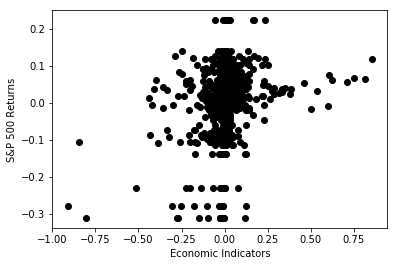

In [7]:
import matplotlib.pyplot as plt

plt.xlabel('Economic Indicators')

plt.ylabel('S&P 500 Returns');

labels = ['text{}'.format(i) for i in range(len(features))]

plt.plot(features, returns, 'o', color='black');


In [8]:
import numpy as np
# TODO: Minimum change of the data
minimum_change = np.min(returns)

# TODO: Maximum change of the data
maximum_change = np.max(returns)

# TODO: Mean change of the data
mean_change = np.mean(returns)

# TODO: Median change of the data
median_change = np.median(returns)

# TODO: Standard deviation of changes of the data
std_change = np.std(returns)

# Show the calculated statistics
print "Statistics for the economic indicator dataset:\n"
print "Minimum return: {:,.2f}".format(minimum_change)
print "Maximum return: {:,.2f}".format(maximum_change)
print "Mean return: {:,.2f}".format(mean_change)
print "Median return {:,.2f}".format(median_change)
print "Standard deviation of returna: {:,.2f}".format(std_change)

Statistics for the economic indicator dataset:

Minimum return: -0.31
Maximum return: 0.22
Mean return: 0.02
Median return 0.03
Standard deviation of returna: 0.08


We will use S&P 500 as the target variable. As noted above, we will drop the change in the Dow Jones Index and keep all other variables as predictive variables.

We will then take 80% of the data for training and 20% for testing. We will use older data as training data and newer data as testing data because we want the dataset to be grouped in chronological order to capture the completeness of the economic and business cycle. Randomly splitting the data will lose that completeness. 

In [9]:
from sklearn import preprocessing
n = data.shape[0]
train_size = 0.8

features_dataframe = data.sort_values('Period')

X_train = data.dropna().drop(['SP500_Change' ,'DJI_Change', 'Period'], axis = 1).iloc[:int(n * train_size)]
X_test = data.dropna().drop(['SP500_Change' ,'DJI_Change', 'Period'], axis = 1).iloc[int(n * train_size):]
y_train = data.dropna().iloc[:int(n * train_size)]['SP500_Change']

y_test = data.dropna().iloc[int(n * train_size):]['SP500_Change']

print("Training variable set has {} samples.".format(X_train.shape[0]))
print("Testing variable set has {} samples.".format(X_test.shape[0]))
print("Training target set has {} samples.".format(y_train.shape[0]))
print("Testing target set has {} samples.".format(y_test.shape[0]))

Training variable set has 99 samples.
Testing variable set has 25 samples.
Training target set has 99 samples.
Testing target set has 25 samples.


In [10]:
# Here we visualize the train/split training and testing dataset

print("X Train")
print(X_train.head())
print("X Test")
print(X_test.head())
print("Y Train")
print(y_train.head())
print("Y Test")
print(y_test.head())

X Train
   ConsConf_Change  CompLead_Change  BusConf_Change  Emp_Change  \
0          -0.0066           0.0031          0.0042     -0.0056   
1          -0.0050           0.0029          0.0042     -0.0029   
2          -0.0027           0.0023          0.0030     -0.0031   
3          -0.0012           0.0011          0.0000      0.0005   
4          -0.0029          -0.0005         -0.0029     -0.0025   

   InvToSales_Change  PMI_Change  MfgOrdDur_Change  BldgPerm_Change  \
0            -0.0229      0.0626            0.0649          -0.0959   
1            -0.0154      0.0116            0.0236          -0.0657   
2             0.0000      0.0375            0.0041          -0.1184   
3             0.0078     -0.0038            0.0286          -0.0741   
4             0.0000     -0.0305            0.0293          -0.1152   

   Sales_Change  FedFunds_Change  Payroll_Change  PersCons_Change  
0        0.0077           0.0000          0.0177           0.0123  
1        0.0185          -

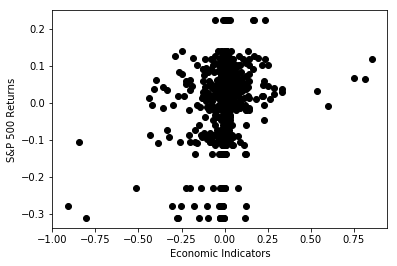

In [11]:
import matplotlib.pyplot as plt
plt.plot(X_train, y_train, 'o', color='black');

plt.xlabel('Economic Indicators')

plt.ylabel('S&P 500 Returns');

# Step 3: Choosing a Model

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % explained_variance_score(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# Explained mean absolute error
print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))


('Coefficients: \n', array([ 3.22587223,  3.54954924,  5.71570181, -1.46555452,  0.80809716,
       -0.22561193,  0.04253103,  0.03562257,  1.53032406, -0.0324433 ,
        0.65890272,  1.44641598]))
Mean squared error: 0.0014
Variance score: 0.0936
r2 score: 0.0211
Mean absolute error: 0.0320


/Users/benwong/anaconda3/envs/py27/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y_train)

# Obtain coefficients
lg.coef_

# Make predictions using the testing set
y_pred = lg.predict(X_test_)

# The coefficients
print('Coefficients: \n', lg.coef_)

# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % explained_variance_score(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# Explained mean absolute error
print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))


('Coefficients: \n', array([ 0.        ,  3.22587223,  3.54954924,  5.71570181, -1.46555452,
        0.80809716, -0.22561193,  0.04253103,  0.03562257,  1.53032406,
       -0.0324433 ,  0.65890272,  1.44641598]))
Mean squared error: 0.0014
Variance score: 0.0936
r2 score: 0.0211
Mean absolute error: 0.0320


In [14]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

# The coefficients
print('Coefficients: \n', clf.coef_)

# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % explained_variance_score(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# Explained mean absolute error
print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))

('Coefficients: \n', array([ 0.01321706,  0.02728161,  0.0199723 ,  0.00292909, -0.06754409,
        0.18626148,  0.10233476,  0.15668423,  0.05897811,  0.05192504,
        0.00767752,  0.01814957]))
Mean squared error: 0.0009
Variance score: 0.3928
r2 score: 0.3591
Mean absolute error: 0.0223


In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

clf = linear_model.Lasso(alpha=0.1)

clf = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,normalize=False, positive=False, precompute=False, random_state=None,selection='cyclic', tol=0.0001, warm_start=False)

clf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

# The coefficients
print('Coefficients: \n', clf.coef_)


# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % explained_variance_score(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# Explained mean absolute error
print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))

('Coefficients: \n', array([ 0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))
Mean squared error: 0.0015
Variance score: 0.0000
r2 score: -0.0739
Mean absolute error: 0.0318


In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

clf = ElasticNet(random_state=0)
clf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

# The coefficients
print('Coefficients: \n', clf.coef_)


# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % explained_variance_score(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# Explained mean absolute error
print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))

('Coefficients: \n', array([ 0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))
Mean squared error: 0.0015
Variance score: 0.0000
r2 score: -0.0739
Mean absolute error: 0.0318


In [17]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

clf = linear_model.SGDRegressor()
clf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

# The coefficients
print('Coefficients: \n', clf.coef_)


# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % explained_variance_score(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# Explained mean absolute error
print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))

('Coefficients: \n', array([ 0.00031368,  0.00079504,  0.00064259,  0.00016563, -0.00240048,
        0.0068875 ,  0.00415546,  0.00739126,  0.00211561,  0.01279572,
        0.00034982,  0.00074403]))
Mean squared error: 0.0014
Variance score: 0.0660
r2 score: -0.0276
Mean absolute error: 0.0314


/Users/benwong/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [18]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error

clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % explained_variance_score(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# Explained mean absolute error
print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))

Mean squared error: 0.0020
Variance score: -0.3332
r2 score: -0.4728
Mean absolute error: 0.0371


In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error

y_train = np.asarray(data.dropna().iloc[:int(n * train_size)]['SP500_Change'], dtype="|S6")

mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='relu',max_iter=5000)
mlp.fit(X_train,y_train)


predictions = mlp.predict(X_test)
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % explained_variance_score(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('r2 score: %.4f' % r2_score(y_test, y_pred))

# Explained mean absolute error
print('Mean absolute error: %.4f' % mean_absolute_error(y_test, y_pred))

Mean squared error: 0.0020
Variance score: -0.3332
r2 score: -0.4728
Mean absolute error: 0.0371


/Users/benwong/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


['ConsConf_Change', 'CompLead_Change', 'BusConf_Change', 'Emp_Change', 'InvToSales_Change', 'PMI_Change', 'MfgOrdDur_Change', 'BldgPerm_Change', 'Sales_Change', 'FedFunds_Change', 'Payroll_Change', 'PersCons_Change']
[0.08092466 0.09919046 0.08549555 0.0804276  0.08286409 0.0871942
 0.08347727 0.09302427 0.08499919 0.07533504 0.0650014  0.08206628]


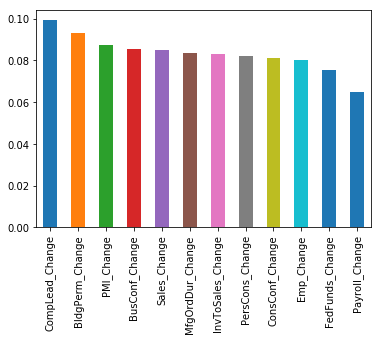

In [40]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
# display the relative importance of each attribute
print(list(X_train))
print(model.feature_importances_)

## https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(14)
   .plot(kind='bar'))        # some method chaining, because it's sexy!